In [64]:
import zipfile

In [65]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-07-04 16:51:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  40.3MB/s    in 4.6s    

2024-07-04 16:51:42 (35.0 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [66]:
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip","r")
zip_ref.extractall()
zip_ref.close()

In [67]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [68]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")


Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [69]:
def plot_graph(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')


In [70]:
import datetime

In [71]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [72]:
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [73]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [76]:
"""
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.

"""
def create_model(model_url, num_classes=10):
    feature_extractor_Layer=hub.KerasLayer(model_url,trainable=False,name="feature_extractor_Layer",input_shape=IMAGE_SHAPE+(3,))
    model=tf.keras.Sequential([feature_extractor_Layer,
                               layers.Dense(num_classes,activation="softmax",name="output_layer")])

    return model


In [77]:
resnet_model=create_model(resnet_url,num_classes=train_data_10_percent.num_classes)
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics="accuracy")

In [78]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240704-165614
Epoch 1/5
24/24 [==============================] - 576s 25s/step - loss: 1.9256 - accuracy: 0.3560 - val_loss: 1.2142 - val_accuracy: 0.6108
Epoch 2/5
24/24 [==============================] - 570s 24s/step - loss: 0.8959 - accuracy: 0.7413 - val_loss: 0.8581 - val_accuracy: 0.7236
Epoch 3/5
24/24 [==============================] - 574s 25s/step - loss: 0.6105 - accuracy: 0.8387 - val_loss: 0.7529 - val_accuracy: 0.7640
Epoch 4/5
24/24 [==============================] - 572s 25s/step - loss: 0.4725 - accuracy: 0.8813 - val_loss: 0.7057 - val_accuracy: 0.7728
Epoch 5/5
24/24 [==============================] - 575s 25s/step - loss: 0.3713 - accuracy: 0.9213 - val_loss: 0.6773 - val_accuracy: 0.7788


In [ ]:
plot_graph(resnet_history)

**mobilev2net-transfer learning for binary classification of ants and bees**

#*HYMENOPTERA BINARY CLASSIFICATION*

In [ ]:
IMAGE_SHAPE=(224,224)

In [13]:
dataset_name = 'thedatasith/hymenoptera'
zip_name = dataset_name.split('/')[-1]

!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name}.zip -d ~/Dataset



Dataset URL: https://www.kaggle.com/datasets/thedatasith/hymenoptera
License(s): CC0-1.0
 90% 41.0M/45.6M [00:02<00:00, 23.5MB/s]
100% 45.6M/45.6M [00:02<00:00, 20.2MB/s]


In [14]:
import zipfile
zip_ref=zipfile.ZipFile("hymenoptera.zip","r")
zip_ref.extractall()
zip_ref.close()

In [15]:
import os
for dirpath,dirname,filename in os.walk("hymenoptera"):
  print(f"There are this many {len(dirname)} directories many {len(filename)} files in {dirpath} ")

There are this many 2 directories many 0 files in hymenoptera 
There are this many 2 directories many 0 files in hymenoptera/train 
There are this many 0 directories many 124 files in hymenoptera/train/ants 
There are this many 0 directories many 121 files in hymenoptera/train/bees 
There are this many 2 directories many 0 files in hymenoptera/val 
There are this many 0 directories many 70 files in hymenoptera/val/ants 
There are this many 0 directories many 83 files in hymenoptera/val/bees 


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir="hymenoptera/train/"
val_dir="hymenoptera/val/"
print("train_dir is ",train_dir)
train_data=train_datagen.flow_from_directory(train_dir,batch_size=BATCH_SIZE,target_size=IMAGE_SHAPE,class_mode="binary")
val_datagen=val_datagen.flow_from_directory(val_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

train_dir is  hymenoptera/train/
Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [17]:
i=5
for images in train_data:
  if (i==0):
    break
  print("images",images)
  i=i-1

images (array([[[[0.6745098 , 0.68235296, 0.6784314 ],
         [0.42352945, 0.42352945, 0.4156863 ],
         [0.73333335, 0.72156864, 0.7019608 ],
         ...,
         [0.427451  , 0.35686275, 0.31764707],
         [0.4156863 , 0.34117648, 0.31764707],
         [0.4431373 , 0.36078432, 0.34117648]],

        [[0.6745098 , 0.68235296, 0.6784314 ],
         [0.42352945, 0.42352945, 0.4156863 ],
         [0.73333335, 0.72156864, 0.7019608 ],
         ...,
         [0.427451  , 0.35686275, 0.31764707],
         [0.4156863 , 0.34117648, 0.31764707],
         [0.4431373 , 0.36078432, 0.34117648]],

        [[0.65882355, 0.6431373 , 0.6313726 ],
         [0.74509805, 0.7254902 , 0.7019608 ],
         [0.7843138 , 0.7490196 , 0.7137255 ],
         ...,
         [0.36078432, 0.2901961 , 0.2509804 ],
         [0.36078432, 0.28235295, 0.25490198],
         [0.41960788, 0.3372549 , 0.31764707]],

        ...,

        [[0.6784314 , 0.5764706 , 0.57254905],
         [0.70980394, 0.60784316, 0.6

In [43]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

num_classes=2
m2=tf.keras.Sequential([
    hub.KerasLayer("https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1",trainable=False,input_shape=IMAGE_SHAPE+(3,)),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])


In [44]:
m2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [45]:
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [46]:
import datetime
os.makedirs("log_file",exist_ok=True)

In [29]:
train_data

In [48]:
m2_history = m2.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=val_datagen,validation_steps=len(val_datagen),callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
experiment_name="mobilenet")])

Saving TensorBoard log files to: tensorflow_hub/mobilenet/20240704-151309
Epoch 1/3
8/8 [==============================] - 23s 3s/step - loss: 0.2964 - accuracy: 0.9057 - val_loss: 0.2914 - val_accuracy: 0.8889
Epoch 2/3
8/8 [==============================] - 17s 2s/step - loss: 0.1675 - accuracy: 0.9467 - val_loss: 0.1963 - val_accuracy: 0.9412
Epoch 3/3
8/8 [==============================] - 17s 2s/step - loss: 0.1201 - accuracy: 0.9549 - val_loss: 0.1784 - val_accuracy: 0.9477


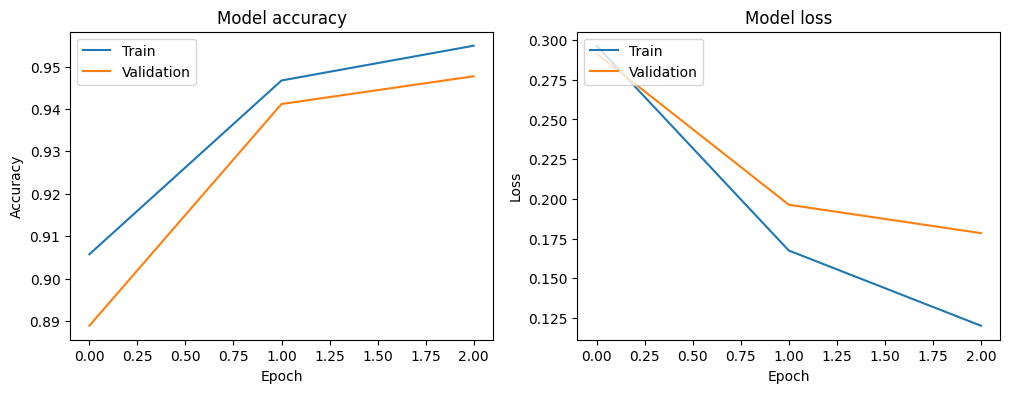

In [52]:
plot_graph(m2_history)

# **Fine tuning in tesorflow **

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

In [ ]:
dir="10_food_classes_10_percent"
for dirpath,dirnames,filenames, in os.walk(dir):
  print(f"The are number of {len(dirnames)} directories number in {len(filenames)} in {dirpath}")

In [ ]:
import tensorflow as tf
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")


In [ ]:
train_data.class_names
len(train_data)

In [ ]:
for images,labels in train_data.take(1):
  print(f"images {images},labels {labels}".format(images,labels))

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs)
print(f"x.shape {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="globale_averag_pooling_layer")(x)
print(f"x.shape is {x.shape}")
outputs=tf.keras.layers.Dense(10,activation="softmax",name="out_put_layer")(x)
print(f"x.shape {x.shape}")
model0=tf.keras.Model(inputs,outputs)
model0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model0.summary()
model0_history=model0.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=create_tensorboard_callback("transfer_learning", "10_percent_feature_extract"))

In [ ]:
model0.summary()

In [ ]:
for num,layer in enumerate(base_model.layers):
  print(f"{num,layer}")

In [ ]:
plot_loss_curves(model0_history)

#global pooling layer
take the average of the input tensor between 2 middle layers

 replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.



In [ ]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
tf_tensor=tf.random.normal(input_shape)
output_layer=tf.keras.layers.GlobalAveragePooling2D()(tf_tensor)
print(f"input_shape{input_shape} output_layer {output_layer.shape}")

In [ ]:
output_layer=tf.reduce_mean(tf_tensor,axis=(1,2))
output_layer.shape,output_layer

#*1% TRAINING DATA  WITH AUGMENTATION*

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
import zipfile
zip_ref=zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
import os
for dirpath,dirname,filename in os.walk("10_food_classes_1_percent"):
  print(f"the no of directories is {len(dirname)},no of files is{len(filename)} in the directory path {dirpath}")

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_ref=ImageDataGenerator(rescale=(1/255.))
test_ref=ImageDataGenerator(rescale=(1/255.))

#train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")


train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")

In [ ]:
from tensorflow.keras import layers
data_augumentation=tf.keras.Sequential(
    [layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)],name="data_augumentation"
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
target_class=random.choice(train_data.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
image=mpimg.imread(random_image_path)
plt.imshow(image)
plt.title(f"original random image from {target_class}")
plt.axis(False)
augmented_image=data_augumentation(tf.expand_dims(image,axis=0))
augmented_image = tf.squeeze(augmented_image) / 255.0
plt.figure()
plt.imshow(augmented_image)
plt.title(f"augmented image of {random_image}")
plt.axis(False)
plt.show()

In [ ]:
def create_model(input_shape=(224,224,3),output_shape=10,learning_rate=0.001,training=False):
    input=tf.keras.layers.Input(shape=input_shape)
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable=False
    x=data_augumentation(input)
    x=base_model(x,training=False)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs=tf.keras.layers.Dense(output_shape,activation="softmax")(x)
    model=tf.keras.Model(input,outputs)
    return model
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])
model.summary()

In [ ]:
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
model_history=model.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),epochs=3,callbacks=create_tensorboard_callback("1 percent","efficientnet"))

In [ ]:
plot_loss_curves(model_history)

In [ ]:
results=model.evaluate(test_data)
results

In [ ]:
checkpoint_path="1_percent_model_checkpoint_weights/checkpoin.ckpt"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True,save_freq="epoch",verbose=1)

In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
model_history=model.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),epochs=3,callbacks=[create_tensorboard_callback("1 percent","efficientnet"),checkpoint_callback])

In [ ]:
result_1_percent=model.evaluate(test_data)

In [ ]:
result_1_percent

In [ ]:
model_2=create_model()
model_2.load_weights(checkpoint_path)


In [ ]:
model_2.trainable=True
for layer in model_2.layers[:-10]:#last 10 layers freezed
  layer.trainable=False
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
for layer_no,layer in enumerate(model_2.layers):
  print(f"the layer no {layer_no} and layer is {layer} layer .trainable {layer.trainable }")

In [ ]:
len(model_2.trainable_variables)

Every time you make a change to your models, you need to recompile them.

In our case, we're using the exact same loss, optimizer and metrics as before, except this time the learning rate for our optimizer will be 10x smaller than before (`0.0001` instead of Adam's default of `0.001`).

We do this so the model doesn't try to overwrite the existing weights in the pretrained model too fast. In other words, we want learning to be more gradual.


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_datagen=ImageDataGenerator(rescale=(1/255.))
test_datagen=ImageDataGenerator(rescale=(1/255.))
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")

In [ ]:
model_2.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data ))

In [ ]:
model_2.evaluate(test_data)